In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as ttt
from sklearn.linear_model import LinearRegression

In [10]:
# load and investigate the data here:
df = pd.read_csv('tennis_stats.csv')
df.head()
print(df.columns)

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


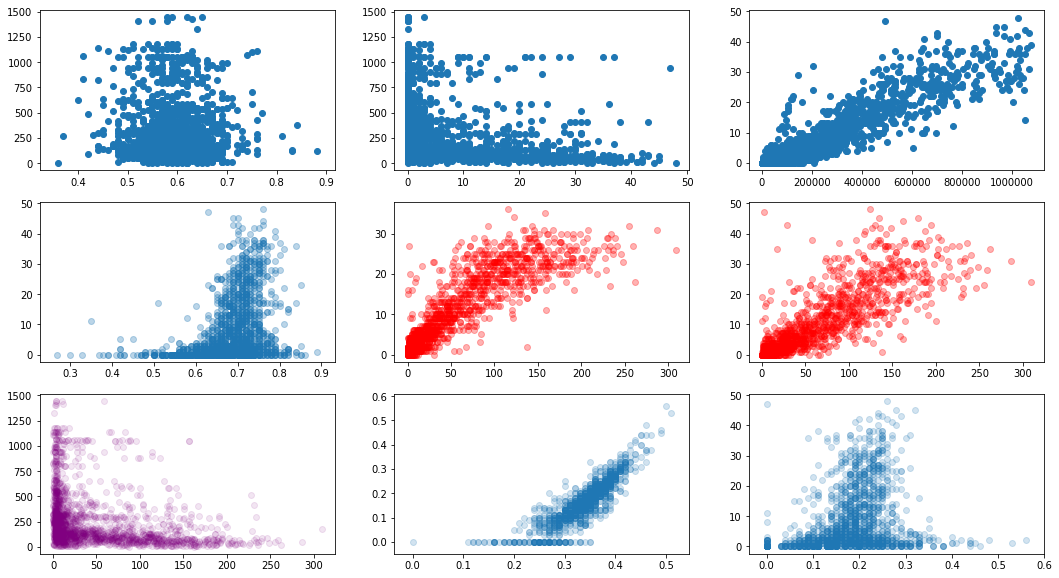

In [38]:
# perform exploratory analysis here:
fig,axs = plt.subplots(nrows=3,ncols = 3,figsize = (18,10))

axs[0,0].scatter(df[['FirstServe']],df[['Ranking']])
axs[0,1].scatter(df[['Wins']],df[['Ranking']])
axs[0,2].scatter(df[['Winnings']],df[['Wins']])
axs[1,0].scatter(df[['FirstServePointsWon']],df[['Wins']],alpha = 0.3)
axs[1,1].scatter(df[['DoubleFaults']],df[['Losses']],alpha =0.3,color = 'r')
axs[1,2].scatter(df[['DoubleFaults']],df[['Wins']],alpha =0.3,color = 'r')
#win_percentage
axs[2,0].scatter(df[['DoubleFaults']],df[['Ranking']],alpha = 0.1,color = 'purple')

axs[2,1].scatter(df[['ReturnPointsWon']],df[['ReturnGamesWon']],alpha = 0.2)
axs[2,2].scatter(df[['ReturnGamesWon']],df[['Wins']],alpha = 0.2)

plt.show()

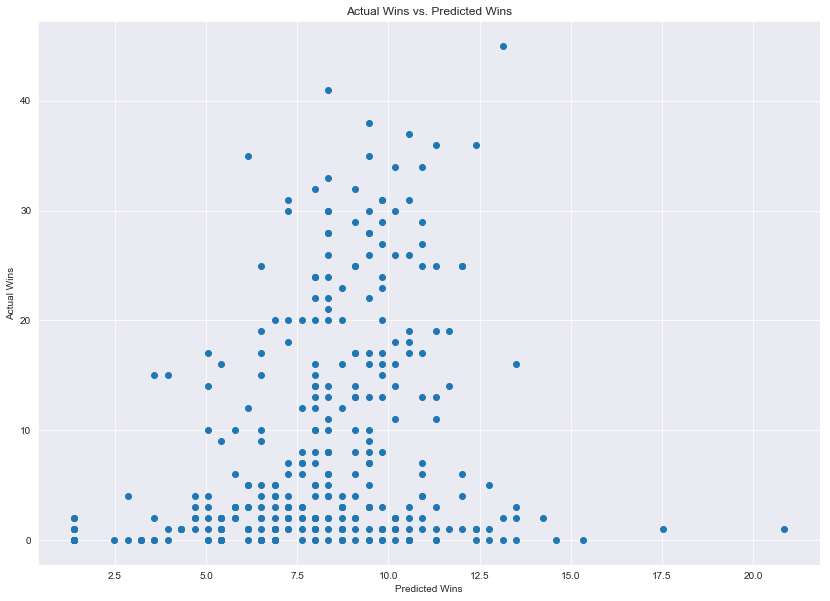

0.078163300061317

In [48]:
## perform single feature linear regressions here:
# We're gonna pick Return games won vs Match Wins
lm = LinearRegression()
x_train,x_test,y_train,y_test = ttt(df[['ReturnGamesWon']],df[['Wins']],train_size = 0.8,test_size = 0.2)

model = lm.fit(x_train,y_train)

y_predict = model.predict(x_test)Fi

fig = plt.figure(figsize = (14,10))
sns.set_style('darkgrid')
plt.scatter(y_predict,y_test)
plt.title('Actual Wins vs. Predicted Wins')
plt.xlabel('Predicted Wins')
plt.ylabel('Actual Wins')

plt.show()
model.coef_
model.score(x_test,y_test)

[[0.15274088]]
0.7507405058176229


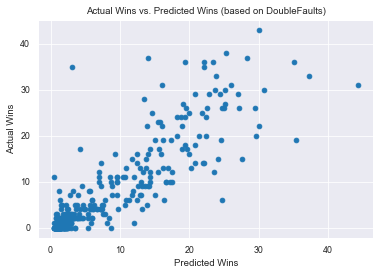

In [50]:
x_train2,x_test2,y_train2,y_test2 = ttt(df[['DoubleFaults']],df[['Wins']],train_size = 0.8,test_size = 0.2)

mod2 = lm.fit(x_train2,y_train2)

y_predict2 = mod2.predict(x_test2)

print(mod2.coef_)
print(mod2.score(x_test2,y_test2))
sns.set_context('paper')

plt.scatter(y_predict2,y_test2)
plt.title('Actual Wins vs. Predicted Wins (based on DoubleFaults)')
plt.xlabel('Predicted Wins')
plt.ylabel('Actual Wins')

plt.show()

[[0.13938015]]
0.7660989180341016


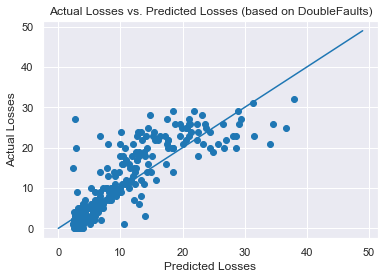

In [64]:
x_train3,x_test3,y_train3,y_test3 = ttt(df[['DoubleFaults']],df[['Losses']],train_size = 0.8,test_size = 0.2)

mod3 = lm.fit(x_train3,y_train3)

y_predict3 = mod3.predict(x_test3)

print(mod3.coef_)
print(mod3.score(x_test3,y_test3))

sns.set_context('notebook')
xs = range(0,50)
ys = [x for x in xs]
plt.scatter(y_predict3,y_test3)
plt.plot(xs,ys)
plt.title('Actual Losses vs. Predicted Losses (based on DoubleFaults)')
plt.xlabel('Predicted Losses')
plt.ylabel('Actual Losses')

plt.show()

[[21865.98721425  -100.25075278]]
0.8395706106101238


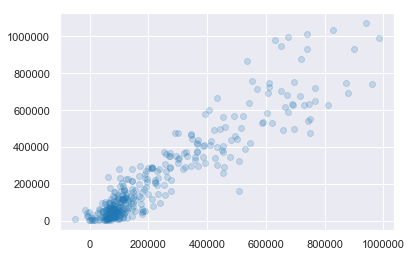

[[ 1427.0337417 75493.8068365]]
0.6352695682856757


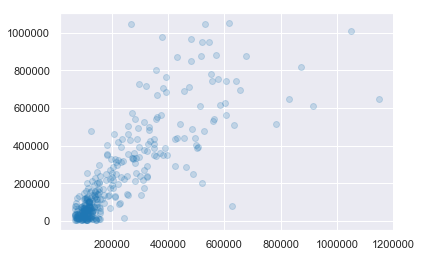

In [66]:
## perform two feature linear regressions here:
x1 = df[['Wins','Ranking']]
y1 = df[['Winnings']]

x1_train,x1_test,y1_train,y1_test = ttt(x1,y1,train_size = 0.8,test_size = 0.2)

mlr1 = lm.fit(x1_train,y1_train)

print(mlr1.coef_)
print(mlr1.score(x1_train,y1_train))

mlr1_predict = mlr1.predict(x1_test)

plt.scatter(mlr1_predict,y1_test,alpha =0.2)
plt.show()



x2 = df[['Aces','BreakPointsConverted']]
x2_train,x2_test,y2_train,y2_test = ttt(x2,y1,train_size = 0.8,test_size = 0.2)

mlr2 = lm.fit(x2_train,y2_train)

print(mlr2.coef_)
print(mlr2.score(x2_train,y2_train))

mlr2_predict = mlr2.predict(x2_test)

plt.cla()
plt.scatter(mlr2_predict,y2_test,alpha =0.2)
plt.show()

[[ 2.16398450e+04 -9.16090686e+01  2.32772458e+05]]
0.8462377527841166


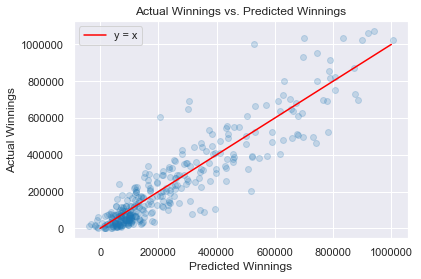

In [69]:
## perform multiple feature linear regressions here:
x3 = df[['Wins','Ranking','TotalPointsWon']]
x3_train,x3_test,y3_train,y3_test = ttt(x3,y1,train_size = 0.8,test_size = 0.2)


mlr3 = lm.fit(x3_train,y3_train)
print(mlr3.coef_)
print(mlr3.score(x3_train,y3_train))

mlr3_predict = mlr2.predict(x3_test)

plt.cla()

plt.scatter(mlr3_predict,y3_test,alpha =0.2)

xs = range(0,1000000)
ys = [x for x in xs]
plt.plot(xs,ys,color = 'r',label = 'y = x')
plt.title('Actual Winnings vs. Predicted Winnings')
plt.ylabel('Actual Winnings')
plt.xlabel('Predicted Winnings')

plt.legend()
plt.show()